
### XYZ Company has offices in four different zones. The company wishes to investigate the following :
* The mean sales generated by each zone.
* Total sales generated by all the zones for each month.
* Check whether all the zones generate the same amount of sales.

*Help the company to carry out their study with the help of data provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
df.shape

(29, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


The given data contains sales data for 4 zones from Month-1 to Month29

In [7]:
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

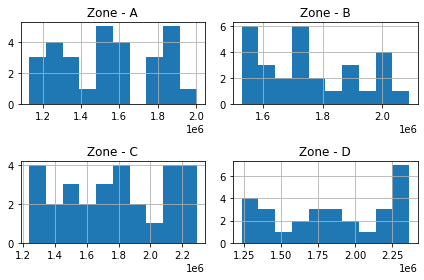

In [8]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].hist()
plt.tight_layout()
plt.show()

## 1.Investigate  mean sales generated by each zone.

In [9]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


Text(0.5, 1.0, 'Sales density plot')

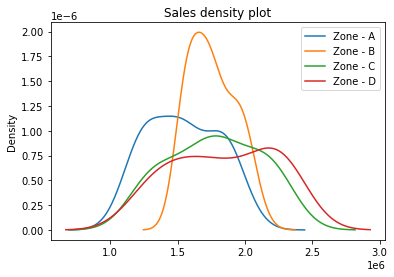

In [10]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].plot(kind ='kde')
plt.title("Sales density plot")

Text(0.5, 1.0, 'Mean sales ')

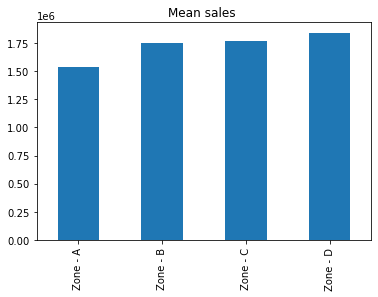

In [11]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].mean().plot(kind ='bar')
plt.title("Mean sales ")

As per the histogram, there is variation in mean sales w.r.t each zone.We will further verify if there is a significant difference in mean sales among the 4 zones using ANOVA test.
* Ho : There is no difference in mean sales among 4 zones.
* H1 : There is difference in mean sales among 4 zones.
* alpha = .05

In [12]:
from scipy.stats import f_oneway

In [13]:
f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'], df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

Since pvalue is less than alpha, we reject the null hypothesis. As per the given data, we can infer that mean sales varies w.r.t zones. 

## 2. Total sales generated by all the zones for each month.

Text(0.5, 1.0, 'Total sales per month')

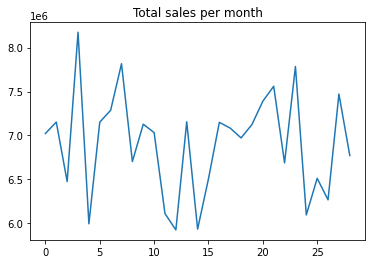

In [14]:
df['Total'] = df['Zone - A'] + df['Zone - B']+ df['Zone - C']+ df['Zone - D']
df['Total'].plot()
plt.title("Total sales per month")

<AxesSubplot:>

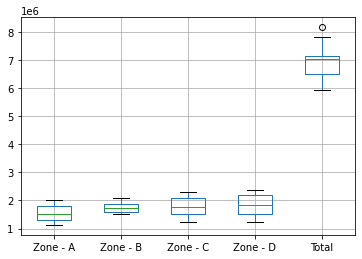

In [15]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D','Total']].boxplot()

Text(0.5, 1.0, 'Mean sales ')

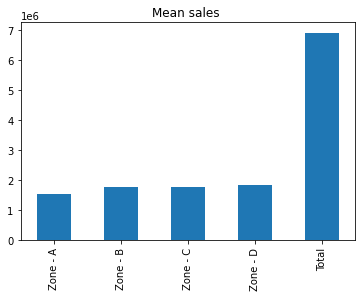

In [16]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D','Total']].mean().plot(kind ='bar')
plt.title("Mean sales ")

Text(0.5, 1.0, 'Total sales')

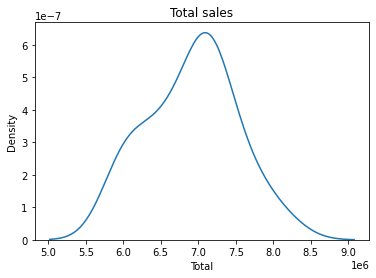

In [17]:
sns.kdeplot(data =df, x = 'Total')
plt.title("Total sales")

In [18]:
df['Total'].describe()

count    2.900000e+01
mean     6.911851e+06
std      5.908919e+05
min      5.925424e+06
25%      6.506659e+06
50%      7.032783e+06
75%      7.155515e+06
max      8.174449e+06
Name: Total, dtype: float64

In [23]:
1e+06/ 5.908919e+05

1.692356926876134

As per given data, total sales generated by all zones for each month follows approximate normal distribution.Mean total sales is 6.9M  with a standard deviation 1.69M

##  Check whether all the zones generate the same amount of sales.

<AxesSubplot:>

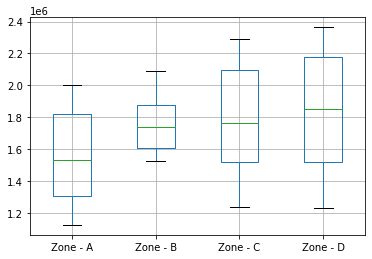

In [19]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].boxplot()

<AxesSubplot:ylabel='Density'>

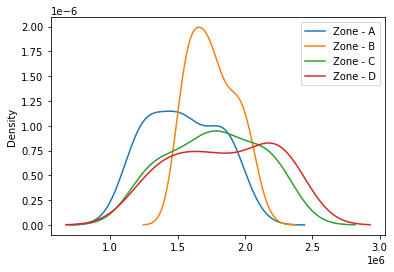

In [20]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].plot(kind ='kde')

As per data, the sales for each zone has different distribution.As per the Anova test on the data ,we concluded that mean sales for all zones are not same.  To compare the sales variation w.r.t each zones , we can use a Tukey's Test.(post hoc  test)

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

C:\Users\zacha\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
Zone - A,Zone - B,215066.4483,0.0324,12856.2973,417276.5992,True
Zone - A,Zone - C,232377.8966,0.0174,30167.7456,434588.0475,True
Zone - A,Zone - D,302433.6207,0.001,100223.4697,504643.7717,True
Zone - B,Zone - C,17311.4483,0.9,-184898.7027,219521.5992,False
Zone - B,Zone - D,87367.1724,0.654,-114842.9786,289577.3234,False
Zone - C,Zone - D,70055.7241,0.7787,-132154.4268,272265.8751,False


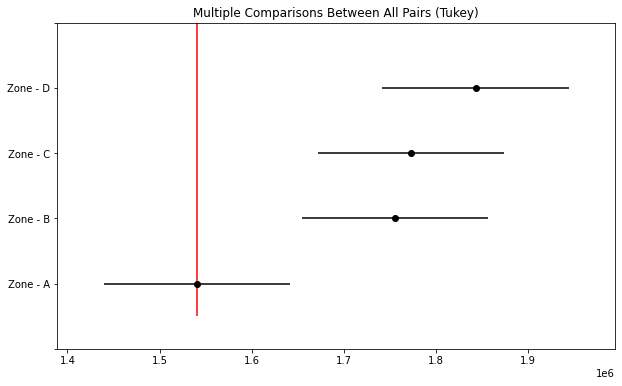

In [22]:
tukey = pairwise_tukeyhsd(endog =pd.concat([df['Zone - A'], df['Zone - B'], df['Zone - C'], df['Zone - D']]),
                  groups = np.repeat(['Zone - A','Zone - B','Zone - C','Zone - D'], repeats = len(df['Zone - A'])),
                  alpha = .05 
                 )
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=1.540493e+06,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()


As per the tukey test ,mean sales varies across Zone A&B, A&C , A&D.There is no significant difference in sales across B&C, B&D, C&D.So we can conclude that zone A mean sales is different compared to other 3 zones.